In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_files = os.listdir("./cleanAssets")
num_files = len(list_files)
data = None
j = 0
for file in list_files:
    print(j)
    print(file)
    file_path = "./cleanAssets/" + file
    total_str = ""
    if (os.path.isfile(file_path)):
        df = pd.read_csv(file_path)
        if df.shape[0] == 91:
            tempValues = list(df[[df.columns[1]]].values.T)[0]

            if('Thousands' in str(df.columns[0])):
                for i in range(len(tempValues)):
                    if '%' not in tempValues[i]:
                        tempValues[i] = float(tempValues[i]) * 1000

                    else:
                        tempValues[i] = float(tempValues[i].replace('%',''))

            elif('Millions' in str(df.columns[0])):
                for i in range(len(tempValues)):
                    if '%' not in tempValues[i]:
                        tempValues[i] =float(tempValues[i]) * 1000000

                    else:
                        tempValues[i] = float(tempValues[i].replace('%',''))
            else:
                print('new factor')

            tempHeader = df[df.columns[0]].values.T
            tempValues = np.array([tempValues])
            tempdf = pd.DataFrame(tempValues, index=[j], columns = tempHeader)
            if j == 0:
                data = tempdf
            else:
                data = pd.concat([data, tempdf])

            j += 1
        else:
            print('skipped')


0
WesBanco Inc. .csv
1
Mid Penn Bancorp .csv
2
LCNB Corporation .csv
3
FVCBankcorp Inc. .csv
4
Valley National Bancorp .csv
5
CNB Financial Corporation .csv
6
Preferred Bank .csv
7
Citizens & Northern Corp .csv
8
UMB Financial Corporation .csv
9
HBT Financial Inc. .csv
10
First Seacoast Bancorp Inc. .csv
11
Horizon Bancorp Inc. .csv
12
City Holding Company .csv
13
TC Bancshares Inc. .csv
14
Comerica Incorporated .csv
15
Amalgamated Financial Corp.  .csv
16
Capital City Bank Group .csv
17
First Community Bankshares Inc. .csv
18
MetroCity Bankshares Inc. .csv
19
Cadence Bank .csv
20
Mid-Southern Bancorp Inc. .csv
21
Shore Bancshares Inc .csv
22
PB Bankshares Inc. .csv
23
MainStreet Bancshares Inc. .csv
24
First Interstate BancSystem Inc. .csv
25
Oak Valley Bancorp .csv
26
Columbia Financial Inc. .csv
27
Southside Bancshares Inc. .csv
28
Webster Financial Corporation .csv
29
Union Bankshares Inc. .csv
30
Fifth Third Bancorp .csv
31
Meridian Corporation .csv
32
Wells Fargo & Company .csv
3

In [3]:
data.head(3)

,Total Cash & Due from Banks,Cash & Due from Banks Growth,Investments 0 Total,Trading Account Securities,Federal Funds Sold & Securities Purchased,Federal Funds Sold,Securities Bought Under Resale Agreement,Treasury Securities,Federal Agency Securities,State & Municipal Securities,...,Other Appropriated Reserves,Unappropriated Reserves,Treasury Stock,Common Equity / Total Assets,Total Shareholders Equity,Total Shareholders Equity / Total Assets,Return On Average Total Equity,Accumulated Minority Interest,Total Equity,Liabilities & Shareholders Equity
0,166000000.0,5.82,4152000000.0,0.0,0.0,0.0,0.0,0.0,230000000.0,1270000000.0,...,2000000.0,0.0,309000000.0,0.13,2427000000.0,14.33,7.5,0.0,2427000000.0,17637000000.0
1,53000000.0,29.85,673000000.0,0.0,3000000.0,3000000.0,0.0,0.0,281000000.0,91000000.0,...,0.0,0.0,5000000.0,0.11,512000000.0,11.38,10.94,0.0,512000000.0,4502000000.0
2,20000000.0,20.43,339000000.0,0.0,0.0,0.0,0.0,76000000.0,78000000.0,69000000.0,...,0.0,0.0,53000000.0,0.1,201000000.0,10.43,10.02,0.0,201000000.0,1924000000.0


In [4]:
def euc_distance(pokemon1, pokemon2):
    #Do the thing
    return np.sqrt(np.sum((pokemon1-pokemon2)**2))

In [5]:
def kmeans(df, distance, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """ 
    #preperations of data
    X = df.values
    
    # Initializing Clusters
    iterations = 0
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    error = None
    
    while diff:
        # for each observation
        distances = np.zeros(X.shape[0])
        for i, row in enumerate(X):
            minDist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = distance(centroid, row)
                # store closest centroid
                if minDist > d:
                    minDist = d
                    distances[i] = minDist
                    cluster[i] = idx
        
        #calculate reconstruction error
        newError = np.sum(distances) 
        centroids = pd.DataFrame(X).groupby(by=cluster).mean().values


        if iterations>1:
             if error - newError <=tol:
                diff = 0
        
        error = newError
                
        iterations +=1

    #print("iterations", iterations)
    return centroids, cluster, error

### Elbow Graph

In [6]:
data = data[['Total Shareholders Equity / Total Assets', 'Cash & Due from Banks Growth']]

In [7]:
data.head(3)

,Total Shareholders Equity / Total Assets,Cash & Due from Banks Growth
0,14.33,5.82
1,11.38,29.85
2,10.43,20.43


In [8]:
#process data
X = data.values

results = []
x = [] 
for i in range(10):
    centroids, cluster, error = None, None, None
    minError = float('inf')

    for j in range(20):
        #calculate K-Means
        c1, c2, e = kmeans(data, euc_distance, k=i+1)
        if e < minError: 
            centroids, cluster, error = c1, c2, e
            #print('error', error)

    
    results.append(error)
    x.append(i+1)

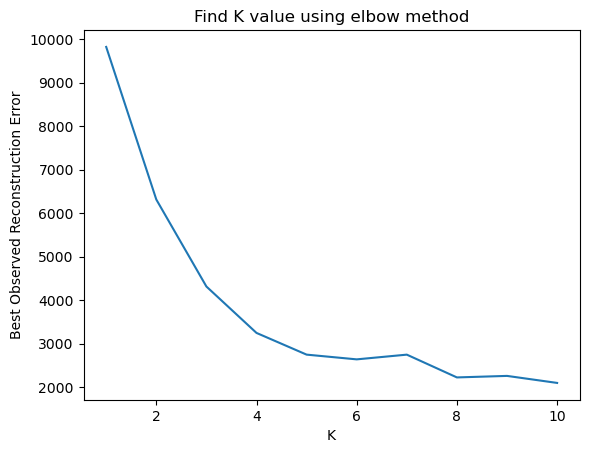

In [9]:
plt.plot(x, results)
plt.title('Find K value using elbow method')
plt.xlabel('K')
plt.ylabel('Best Observed Reconstruction Error')
plt.show()

In [10]:
#process data
X = data.values

centroids, cluster, error = None, None, None
minError = float('inf')

for i in range(20):
    #calculate K-Means
    c1, c2, e = kmeans(data, euc_distance, k=3)
    if e < minError: 
        centroids, cluster, error = c1, c2, e
print('error', error)

error 4457.840225528742


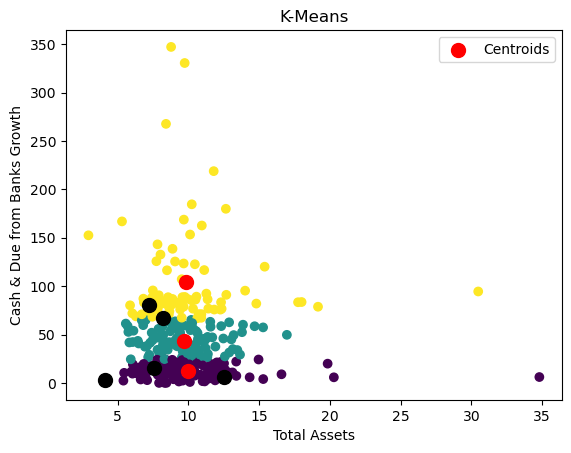

In [13]:
#plot data
plt.scatter(X[:,0],X[:,1], c=cluster)
plt.scatter(centroids[:,0],centroids[:,1], s=100, color='r', label='Centroids')
#svb
plt.scatter(X[111,0],X[111,1], s=100, color="black")
#silvergate
plt.scatter(X[117,0],X[117,1], s=100, color="black")
#first republic
plt.scatter(X[60,0],X[60,1], s=100, color="black")
#union
plt.scatter(X[29,0],X[29,1], s=100, color="black")
#signature
plt.scatter(X[232,0],X[232,1], s=100, color="black")


#plt.scatter(sigbank_coords[0], sigbank_coords[1], color="black")
plt.title('K-Means')
plt.xlabel('Total Assets')
plt.ylabel('Cash & Due from Banks Growth')
plt.legend()
plt.show()

In [12]:
print(X.shape)

(296, 2)
